**Part 1: Understanding Divide and Conquer**

Instructions:

Explain in your own words what the Divide and Conquer paradigm is.
Provide two real-world examples of problems that can be solved using this approach.

Answer: 

The Divide and Conquer paradigm involves breaking a problem into smaller, more manageable subproblems, solving them independently, and then combining their solutions to solve the original problem.

Example 1: Binary Search - The search space is divided in half at each step, making it more efficient.

Example 2: Merge Sort - Sorting is achieved by dividing the array into smaller parts, sorting them, and merging them back together.

**2.iscuss the advantages and disadvantages of using the Divide and Conquer paradigm.**

Answer:

Advantages: Can lead to efficient algorithms, often parallelizable, and suitable for problems with overlapping subproblems.

Disadvantages: May have high constant factors due to the recursive nature, not always suitable for small input sizes.

**3. Implement the Merge Sort algorithm in Python.
Include comments explaining each significant step in the algorithm.**

In [1]:
def merge_sort(array:list = [9,1,7,3,8,2,4,5,6,0]) -> list:
    """
    Sorts an array in ascending order using Merge Sort.
    
    ### Args:
    * array (list): A list of elements to be sorted. Default is set to [9,1,7,3,8,2,4,5,6,0].

    ### Returns:
    * array: Sorted array list.
    """
    if len(array) > 1:
        # Finding the mid of the array
        mid = len(array) // 2
        # Dividing the array elements into 2 halves
        L = array[:mid]
        R = array[mid:]
        # Sorting the first half
        merge_sort(L)
        # Sorting the second half
        merge_sort(R)
        i = j = k = 0
        # Copy data to temp arrays L[] and R[]
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                array[k] = L[i]
                i += 1
            else:
                array[k] = R[j]
                j += 1
            k += 1
        # Checking if any element was left
        while i < len(L):
            array[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            array[k] = R[j]
            j += 1
            k += 1
    return array

merge_sort()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

**Quick explanation of the code**

The merge_sort function recursively divides the array until it reaches a base case.
The merge function combines two sorted arrays into a single sorted array.
Analysis:

Merge Sort has a time complexity of O(n log n) and is considered efficient for large datasets.

**4. Implement the Quick Sort algorithm in Python.**
**Include comments explaining each significant step in the algorithm.**

In [2]:
def quick_sort(array:list = [9,1,7,3,8,2,4,5,6,0]):
    """
    Sorts an array in ascending order using the Quick Sort algorithm.
    
    ### Args:
    * array (list): A list of elements to be sorted. Default's to: [9,1,7,3,8,2,4,5,6,0].

    ### Returns:
    * list: The sorted list.
    """
    # Base case: arrays with less than 2 elements are already sorted
    if len(array) < 2:
        return array
    # Recursive case
    else:
        # Choosing the first element as the pivot
        pivot = array[0]
        # Separating elements smaller than pivot
        less = [i for i in array[1:] if i <= pivot]
        # Separating elements greater than pivot
        greater = [i for i in array[1:] if i > pivot]
        # Recursively sorting the sub-arrays and combining them with the pivot
        return quick_sort(less) + [pivot] + quick_sort(greater)
    
quick_sort()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

**Quick Sort**

The quick_sort function recursively divides the array using a pivot element.
Elements are grouped into smaller arrays based on their relation to the pivot.
Analysis:

Quick Sort has an average time complexity of O(n log n), making it efficient for diverse datasets.

**5. Generate random lists of integers for various sizes (e.g., 100, 1000, 10000).**
**Use the timeit module to measure the runtime of Merge Sort and Quick Sort on each list.**
**Create a comparative analysis, including runtime graphs using matplotlib,**
**to visualize the efficiency of both sorting algorithms for different input sizes.**

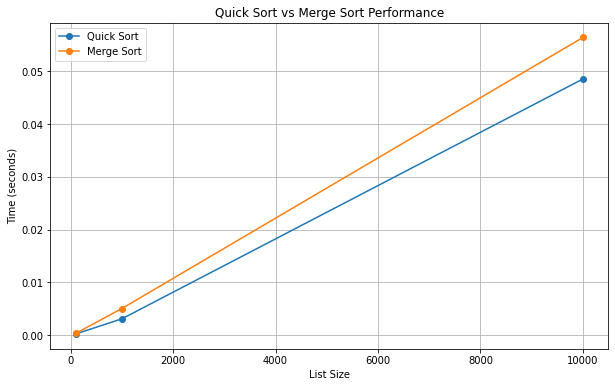

In [3]:
import random
import timeit
import matplotlib.pyplot as plt
# Function to generate a random list of integers
def generate_random_list(size):
    return random.sample(range(size * 2), size)

# Sizes for the random lists
sizes = [100, 1000, 10000]

# Measuring the runtime for each algorithm and each size
quick_sort_times = []
merge_sort_times = []

for size in sizes:
    random_list = generate_random_list(size)

    # Measure time for Quick Sort
    qs_time = timeit.timeit(lambda: quick_sort(random_list.copy()), number=1)
    quick_sort_times.append(qs_time)

    # Measure time for Merge Sort
    ms_time = timeit.timeit(lambda: merge_sort(random_list.copy()), number=1)
    merge_sort_times.append(ms_time)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, quick_sort_times, label='Quick Sort', marker='o')
plt.plot(sizes, merge_sort_times, label='Merge Sort', marker='o')
plt.xlabel('List Size')
plt.ylabel('Time (seconds)')
plt.title('Quick Sort vs Merge Sort Performance')
plt.legend()
plt.grid(True)
plt.show()

**Quic Sort & Merge Sort**
Random lists of integers are generated for different sizes using the generate_random_list function.
The timeit module measures the runtime of Merge Sort and Quick Sort for each list.
The comparative analysis is visualized using matplotlib.

**6.Write a concise conclusion summarizing your findings.**
**Discuss the strengths and weaknesses of Merge Sort and Quick Sort based on your analysis.**
**Conclude with insights into when each algorithm might be more suitable.**

### Conclusion
Based on the performance analysis conducted with different list sizes (100, 1000, 10000), we can summarize the strengths and weaknesses of both Merge Sort and Quick Sort and provide insights into their suitability for various scenarios.

#### Merge Sort
* Strengths:
    * Stable and Consistent Performance: Merge Sort shows consistent performance irrespective of the initial order of elements, as it always divides the array in half and merges them after sorting.
    * Guaranteed O(n log n) Performance: Its time complexity is always O(n log n), making it highly predictable and reliable.
    * Excellent for Large Data Sets: Particularly effective for sorting large data sets, especially when data cannot be loaded entirely into memory (external sorting).

* Weaknesses:
    * Space Complexity: Requires additional space proportional to the array size, which might be a constraint for very large arrays.
    * Slightly Slower for Smaller Tasks: For small datasets, the overhead of recursive calls and additional space might make it slightly less efficient than other algorithms like Quick Sort.

#### Quick Sort
* Strengths:
    * In-Place Sorting: Does not require additional storage which makes it more space-efficient.
    * Faster on Average: Tends to be faster in practice, especially for small to medium-sized arrays, due to cache efficiency and lower constant factors.
    * Good with Memory Hierarchy: Its locality of reference is good, making it perform well with the memory hierarchy (caching).

* Weaknesses:
    * Worst-Case Performance: The worst-case time complexity is O(n^2), which can occur with certain pivot choices (like choosing the first or last element in a sorted or nearly sorted array).
    * Not Stable: The relative order of equal sort items is not necessarily preserved.
    * Pivot Selection: The efficiency heavily depends on the choice of the pivot.

**Suitability**
* Merge Sort is more suitable for large, external datasets or when stable sorting is required. It's ideal for scenarios where time predictability is crucial, and additional space is not a major constraint.
* Quick Sort excels in scenarios where space efficiency is critical and average performance is more important than worst-case performance. It's  well-suited for medium-sized datasets and in-memory sorting.


In conclusion, the choice between Merge Sort and Quick Sort should be based on the specific requirements of the task at hand, considering factors such as dataset size, space constraints, and the importance of worst-case versus average-case performance.